In [1]:
from copy import deepcopy
from time import time
import numpy as np
from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.ConsIndShockModel import (
    init_idiosyncratic_shocks
)

from HARK.ConsumptionSaving.ConsRepAgentModel import (
    RepAgentConsumerType,
    RepAgentMarkovConsumerType,
)

In [2]:
# Make a quick example dictionary
RA_params = deepcopy(init_idiosyncratic_shocks)
RA_params["DeprFac"] = 0.05
RA_params["CapShare"] = 0.36
RA_params["UnempPrb"] = 0.0
RA_params["LivPrb"] = [1.0]

Solving a representative agent problem took 0.16342997550964355 seconds.


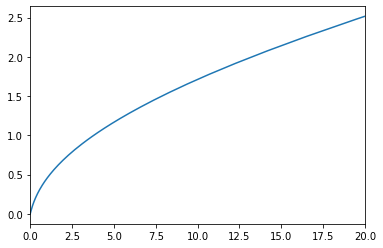

In [3]:
# Make and solve a rep agent model
RAexample = RepAgentConsumerType(**RA_params)
t_start = time()
RAexample.solve()
t_end = time()
print(
    "Solving a representative agent problem took " + str(t_end - t_start) + " seconds."
)
plotFuncs(RAexample.solution[0].cFunc, 0, 20)

In [4]:
# Simulate the representative agent model
RAexample.T_sim = 2000
RAexample.track_vars = ["cNrmNow", "mNrmNow", "Rfree", "wRte"]
RAexample.initializeSim()
t_start = time()
RAexample.simulate()
t_end = time()
print(
    "Simulating a representative agent for "
    + str(RAexample.T_sim)
    + " periods took "
    + str(t_end - t_start)
    + " seconds."
)

Simulating a representative agent for 2000 periods took 2.174649715423584 seconds.


Solving a two state representative agent problem took 0.4681053161621094 seconds.


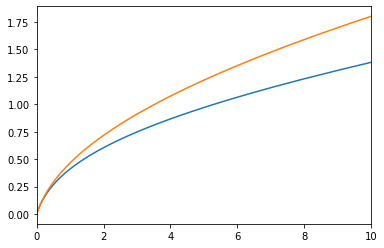

In [5]:
# Make and solve a Markov representative agent
RA_markov_params = deepcopy(RA_params)
RA_markov_params["PermGroFac"] = [[0.97, 1.03]]
RA_markov_params["MrkvArray"] = np.array([[0.99, 0.01], [0.01, 0.99]])
RA_markov_params["MrkvNow"] = 0
RAmarkovExample = RepAgentMarkovConsumerType(**RA_markov_params)
RAmarkovExample.IncomeDstn[0] = 2 * [RAmarkovExample.IncomeDstn[0]]
t_start = time()
RAmarkovExample.solve()
t_end = time()
print(
    "Solving a two state representative agent problem took "
    + str(t_end - t_start)
    + " seconds."
)
plotFuncs(RAmarkovExample.solution[0].cFunc, 0, 10)

In [6]:
# Simulate the two state representative agent model
RAmarkovExample.T_sim = 2000
RAmarkovExample.track_vars = ["cNrmNow", "mNrmNow", "Rfree", "wRte", "MrkvNow"]
RAmarkovExample.initializeSim()
t_start = time()
RAmarkovExample.simulate()
t_end = time()
print(
    "Simulating a two state representative agent for "
    + str(RAexample.T_sim)
    + " periods took "
    + str(t_end - t_start)
    + " seconds."
)

Simulating a two state representative agent for 2000 periods took 2.6130998134613037 seconds.
